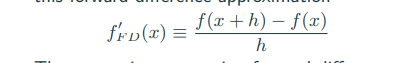

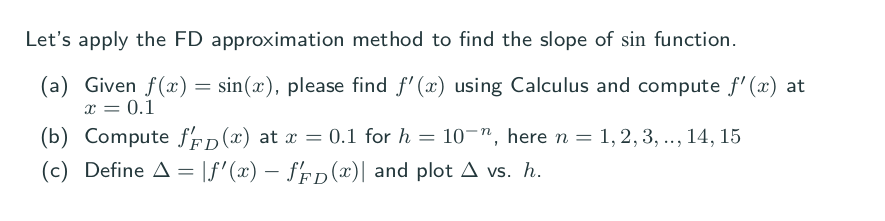

In [44]:
import numpy as np

f_prime = np.cos(0.1)
print (f_prime)


0.9950041652780258


In [49]:
x = 0.1
h = 0.001
f_a = np.sin(x+h)
f_b = np.sin(x)
f_prime_FD = (f_a - f_b)/h
print ("h = %f, f_prime_FD = %f"%(h, f_prime_FD))


h = 0.001000, f_prime_FD = 0.994954




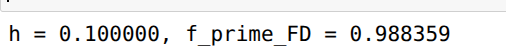
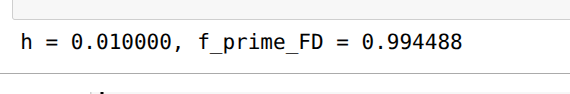
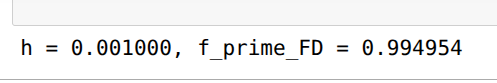

In [50]:
def FD_diff(x,h):
    f_a = np.sin(x+h)
    f_b = np.sin(x)
    f_prime_FD = (f_a - f_b)/h
    return f_prime_FD
     
#x = 0.1
#h = 0.1   
f_prime_FD = FD_diff(x,h)

print ("h = %f, f_prime_FD = %f"%(h, f_prime_FD))

h = 0.100000, f_prime_FD = 0.988359


[0.98835914 0.99448842 0.99495408 0.99499917 0.99500367 0.99500412
 0.99500416 0.99500417 0.99500416 0.99500408 0.99500408 0.99500963
 0.99503739]


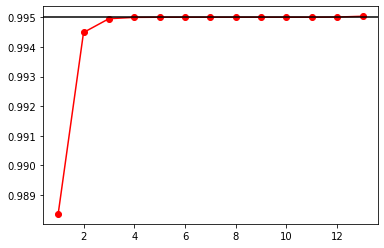

In [59]:
#h = 0.1, 0.01, etc
n_arr = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])
h_arr = 10.** (-n_arr) #..
#print (h_arr)
x = 0.1
f_prime_FD = FD_diff(x,h_arr)
print (f_prime_FD)
f_prime_true = np.cos(x)

import matplotlib.pyplot as plt

plt.plot(n_arr, f_prime_FD,'ro-')
plt.axhline(y=f_prime_true, color='k', linestyle='-')



Text(0, 0.5, "$err = |f' - f'_{FD}|$")

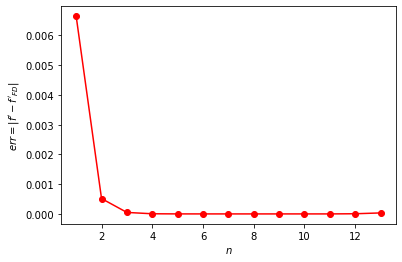

In [61]:
err = abs(f_prime_FD - f_prime_true)
plt.plot(n_arr, err,'ro-')

plt.xlabel(r"$n$")
plt.ylabel(r"$err = |f' - f'_{FD}|$")

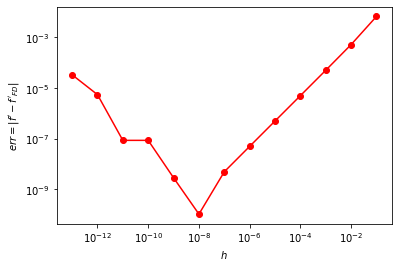

In [64]:
err = abs(f_prime_FD - f_prime_true)
plt.plot(h_arr, err,'ro-')

plt.xlabel(r"$h$")
plt.ylabel(r"$err = |f' - f'_{FD}|$")
plt.xscale('log')
plt.yscale('log')